# Quantum Computing - Qiskit

#### Made By : Gaurav Baweja
##### Source : https://github.com/Aanvikshiki/Quantum_Computing
##### Reference: https://qiskit.org/textbook/ch-states/atoms-computation.html

### Create Half-Adder Circuit

In [41]:
#Import Libraries
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex, plot_state_qsphere

In [42]:
#Input State: 01
qc_ha=QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.barrier()

In [43]:
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)

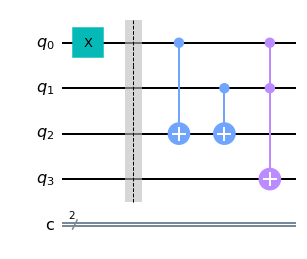

In [44]:
# Draw the circuit
qc_ha.draw(output='mpl')

In [45]:
# Let's get the result:
svsim=Aer.get_backend('aer_simulator')
qc_ha.save_statevector()
qobj = assemble(qc_ha)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

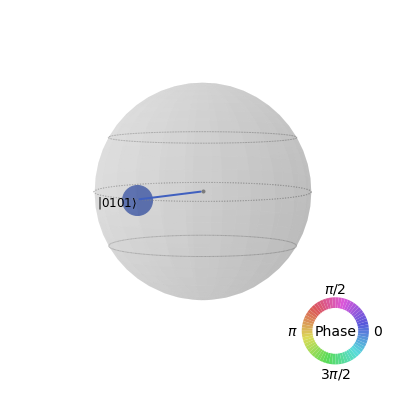

In [46]:
#Plot Sphere
plot_state_qsphere(final_state)

In [47]:
# Map the quantum measurement to the classical bits
qc_ha.measure(2,0)
qc_ha.measure(3,1)

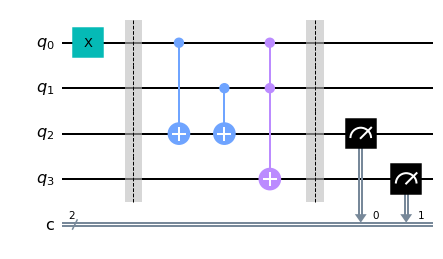

In [48]:
# Draw the circuit
qc_ha.draw(output='mpl')

In [49]:
# compile the circuit down to low-level QASM instructions
simulator = QasmSimulator()
compiled_circuit = transpile(qc_ha, simulator)
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()

/Users/gauravbaweja/miniforge3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/gauravbaweja/miniforge3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [50]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'01': 1000}


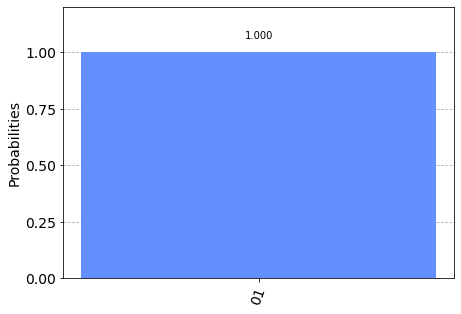

In [51]:
#Plot histogram of result
plot_histogram(counts)